In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# 優化(第四題)

In [4]:
X.isnull().sum()
dummy_series = pd.DataFrame({"text":["dummy_record"],"category" :[1]})

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [37]:
#Answer here
X.query('category == 1') #query category = 1

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
...,...,...,...
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,1,comp.graphics
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics


In [38]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

NA_df['missing_example'].isnull()

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
# Answer here

# for np.nan,None,and nothing, they will be sucessfully recognized as null.
# however, for "none","nan" and " ", they will be recognize as string. 
for i in range(6):
    print(type(NA_df['missing_example'][i]))
#so we observe that even though we see "NAN", it's possible that it's not mull.

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


In [39]:
X_sample = X.sample(n=1000) #random state

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

In [ ]:
NA_df['missing_example'].isnull()

In [ ]:
# Answer here

# for np.nan,None,and nothing, they will be sucessfully recognized as null.
# however, for "none","nan" and " ", they will be recognize as string. 
for i in range(6):
    print(type(NA_df['missing_example'][i]))
#so we observe that even though we see "NAN", it's possible that it's not mull.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [40]:
# Answer here
#1. the order changed
print(X)
print(X_sample)

#2. number of data change
print(len(X))
print(len(X_sample))

#3. x is static, X_sample is not


                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religi

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

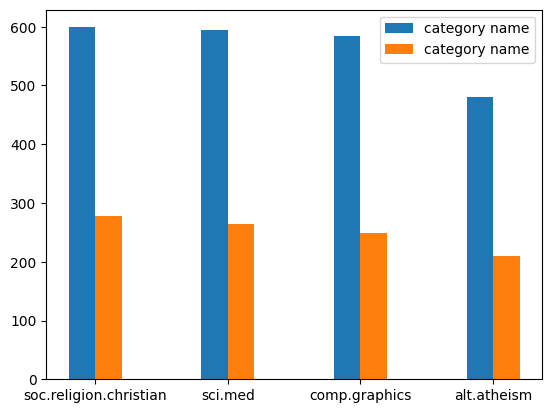

In [41]:
import matplotlib.pyplot as plt
# Answer here

#already checked that A and B have the same index order. 
A = X.category_name.value_counts()
B = X_sample.category_name.value_counts()

x_axis = np.arange(len(A.index))
# Multi bar Chart

plt.bar(x_axis - 0.1 , A, width=0.2, label = 'category name')
plt.bar(x_axis + 0.1, B, width=0.2, label = 'category name')

# Xticks
plt.xticks(x_axis,A.index)
# Add legend
plt.legend()
# Display
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

# Answer here
# to find the number of the targert, we can manually decrease the number of the data
X_counts[4, 0:50].toarray() 
#for loop to fi(nd the '1'
for i in  range(50) :
    if i != 0 and   X_counts[4, i] == 1:
        print(count_vect.get_feature_names_out()[i])

01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

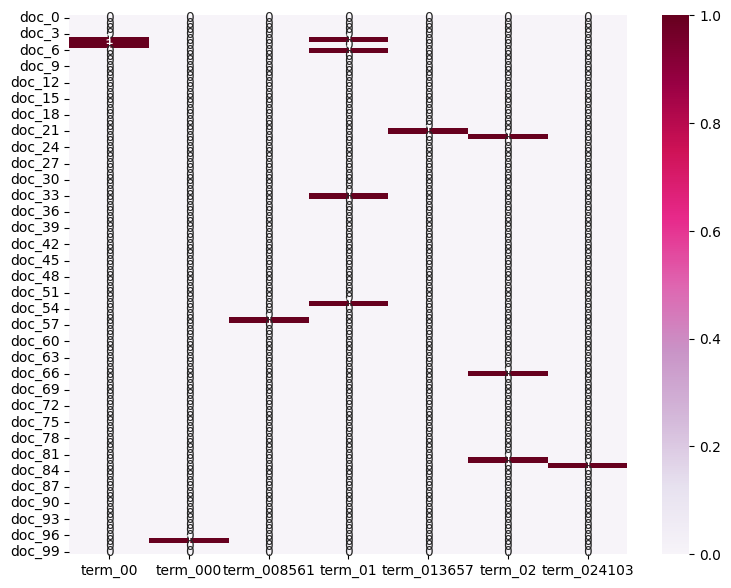

In [43]:
import seaborn as sns
# Answer here
# take 100,100 as example 
# 1. because there are so many words, abandon the words that are never used.
# draw take more time than scan the words.
idx = np.argwhere(np.all( X_counts[0:100,0:100].toarray()== 0, axis=0)) 
a = np.delete(X_counts[0:100,0:100].toarray(), idx, axis = 1)
b = np.delete(count_vect.get_feature_names_out()[0:100], idx)
# obtain document index
plot_x = ["term_"+str(i) for i in b[:]]


plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]

plot_z = a[:, :]
plot_z

# draw
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

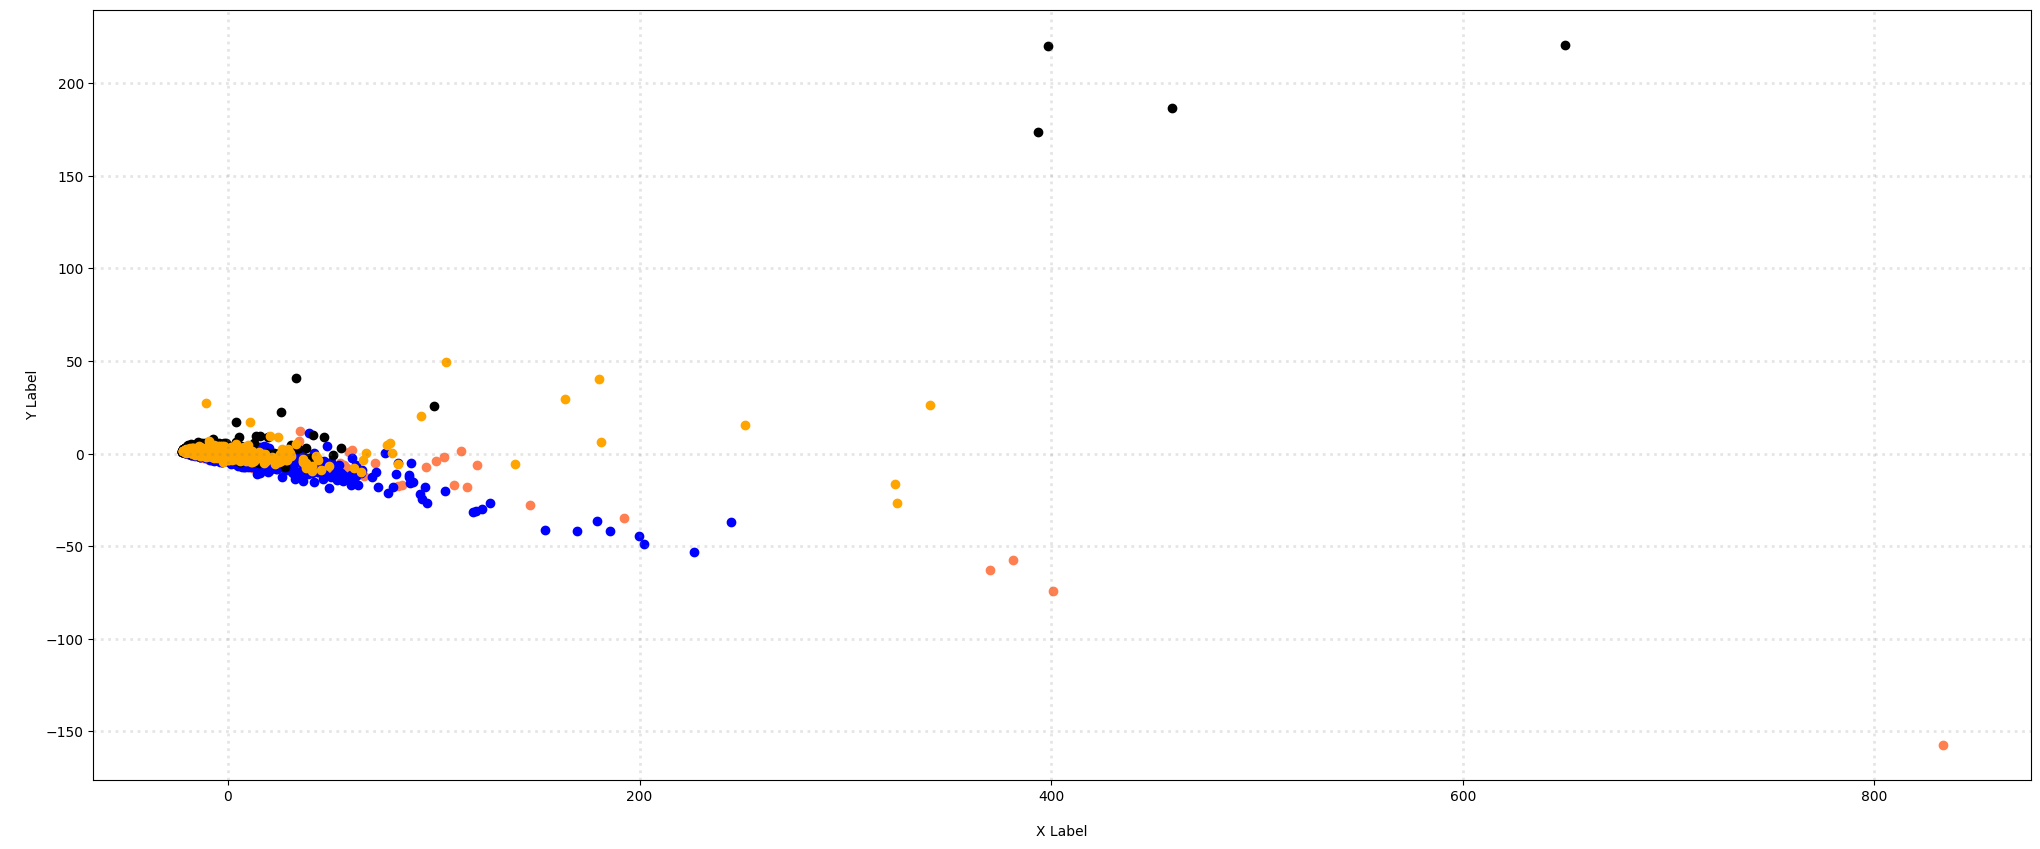

In [44]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape
categories

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [5]:
import matplotlib.pyplot as plt

X_reduced_ = PCA(n_components = 3).fit_transform(X_counts.toarray()) #reduce dimension

# draw
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = X_reduced_.T[0]
sequence_containing_y_vals = X_reduced_.T[1]
sequence_containing_z_vals = X_reduced_.T[2]

ax.view_init(elev=46, azim=33)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals,c = 'purple') # NTHU 's purple
plt.show()

NameError: name 'PCA' is not defined

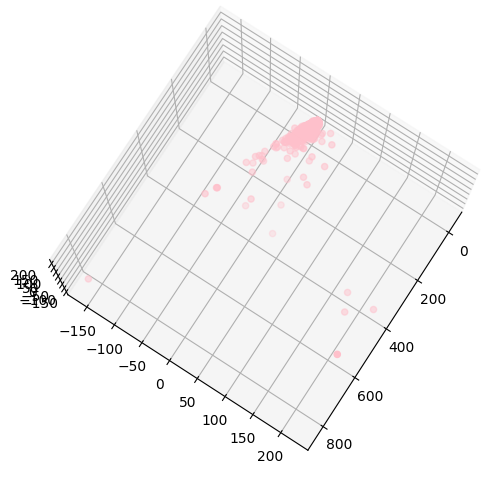

In [46]:
import matplotlib.pyplot as plt

X_reduced_ = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = X_reduced_.T[0]
sequence_containing_y_vals = X_reduced_.T[1]
sequence_containing_z_vals = X_reduced_.T[2]

ax.view_init(elev=80, azim=33)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals ,c = 'pink')
plt.show()

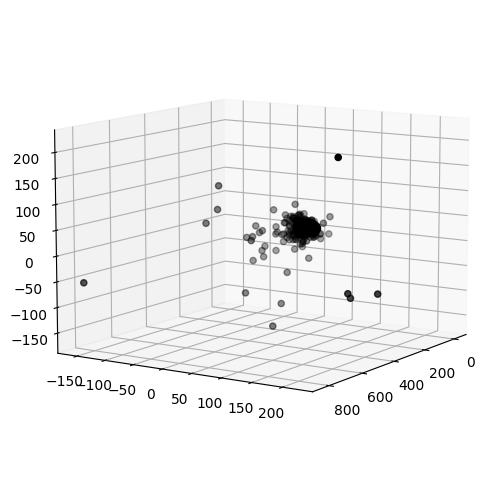

In [47]:
import matplotlib.pyplot as plt

X_reduced_ = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = X_reduced_.T[0]
sequence_containing_y_vals = X_reduced_.T[1]
sequence_containing_z_vals = X_reduced_.T[2]

ax.view_init(elev=10, azim=33)
ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c = 'black')
plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

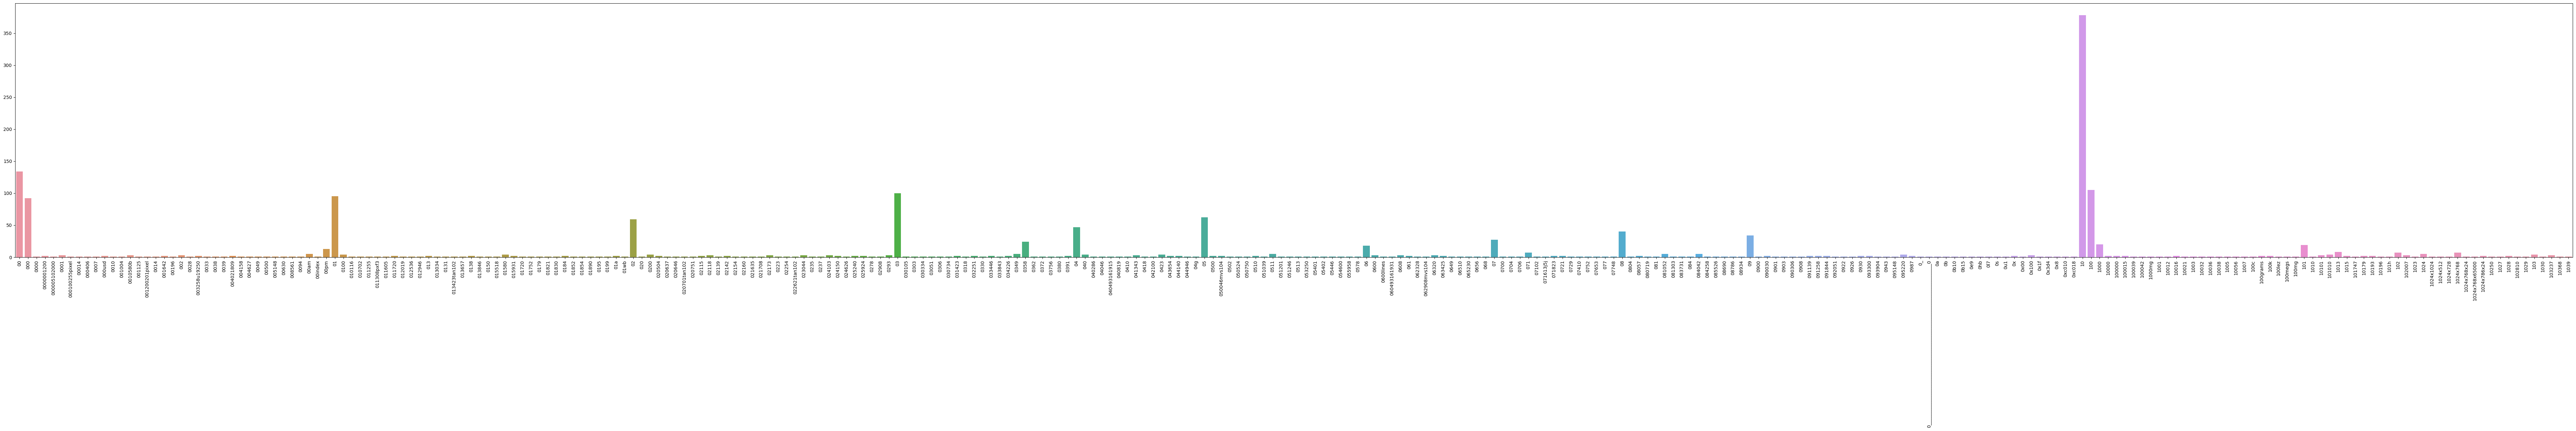

In [48]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
#for j in range(0,X_counts.shape[1]):
for j in range(0,300):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [49]:

# Answer here
# use go to produce interactive visualision
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names_out()[0:300], 
            y=term_frequencies[:300])],
)
fig

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [6]:
# Answer here
# reduce the data
term_frequencies_shift =  term_frequencies[:300]-1
count_vect_new = []
term_frequencies_new = [] 
# construct the new data
for vect , freq in zip(count_vect.get_feature_names_out()[:300],term_frequencies_shift):  
    if freq > 0:
        count_vect_new.append(vect)
        term_frequencies_new.append(freq)
# draw
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new, 
            y=term_frequencies_new)
g.set_xticklabels(count_vect_new, rotation = 90)

NameError: name 'term_frequencies' is not defined

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

[Text(0, 0, '10'),
 Text(1, 0, '00'),
 Text(2, 0, '100'),
 Text(3, 0, '03'),
 Text(4, 0, '01'),
 Text(5, 0, '000'),
 Text(6, 0, '05'),
 Text(7, 0, '02'),
 Text(8, 0, '04'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '07'),
 Text(12, 0, '0358'),
 Text(13, 0, '1000'),
 Text(14, 0, '101'),
 Text(15, 0, '06'),
 Text(16, 0, '00pm'),
 Text(17, 0, '1013'),
 Text(18, 0, '102'),
 Text(19, 0, '1024x768'),
 Text(20, 0, '071'),
 Text(21, 0, '1024'),
 Text(22, 0, '00am'),
 Text(23, 0, '0349'),
 Text(24, 0, '084042'),
 Text(25, 0, '0511'),
 Text(26, 0, '081052'),
 Text(27, 0, '101010'),
 Text(28, 0, '0200'),
 Text(29, 0, '0100'),
 Text(30, 0, '103'),
 Text(31, 0, '095220'),
 Text(32, 0, '0423'),
 Text(33, 0, '040'),
 Text(34, 0, '01580'),
 Text(35, 0, '02118'),
 Text(36, 0, '0293'),
 Text(37, 0, '0600'),
 Text(38, 0, '02173'),
 Text(39, 0, '041343'),
 Text(40, 0, '023044'),
 Text(41, 0, '024103'),
 Text(42, 0, '0608'),
 Text(43, 0, '06320'),
 Text(44, 0, '0x100'),
 Text(45, 0, '102007'),
 T

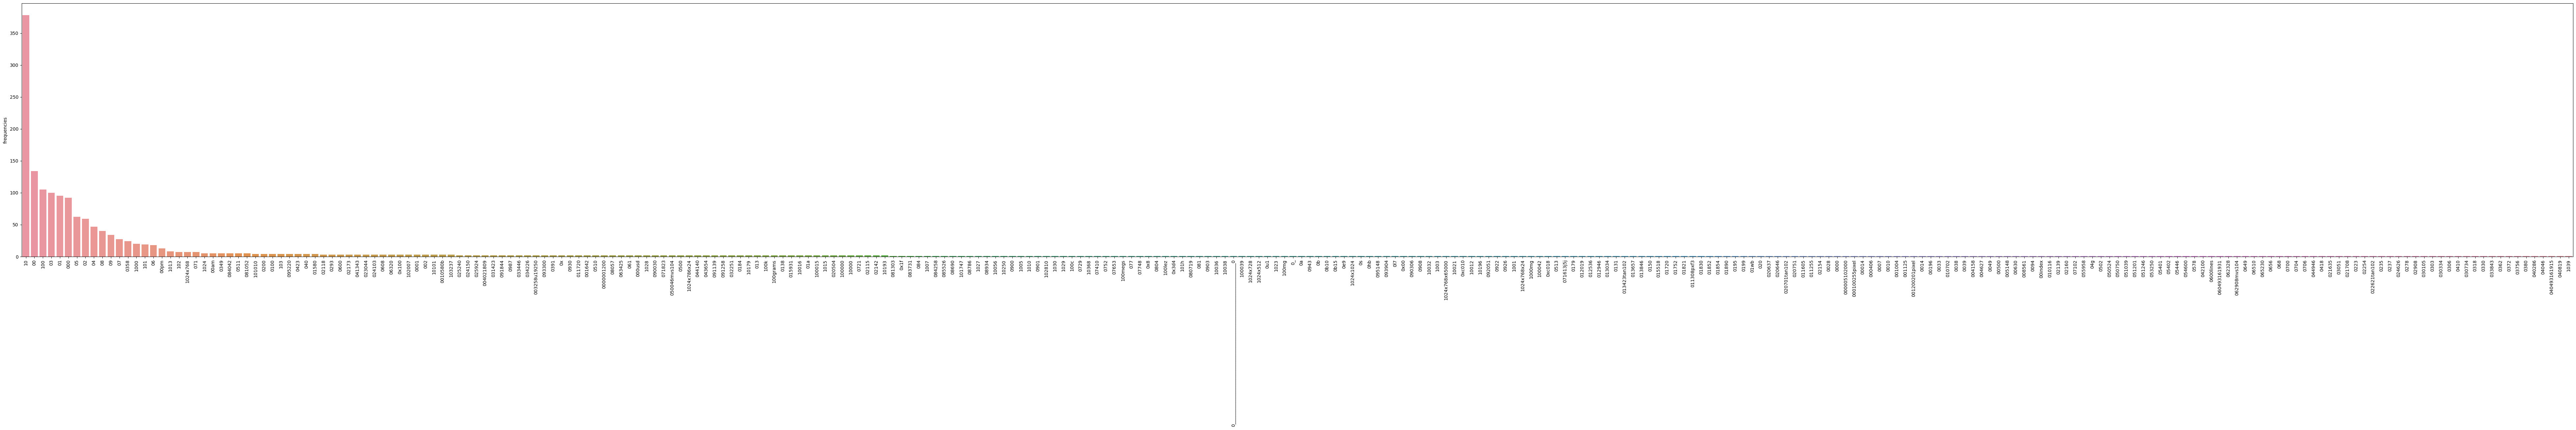

In [51]:
# Answer here
# construct data frame
new_dataframe = pd.DataFrame(term_frequencies_new,
            index = count_vect_new,
            columns=['frequencies'])
# sort the data
new_dataframe = new_dataframe.sort_values(by = ['frequencies'],ascending=False)
# draw
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=new_dataframe.index, 
            y=new_dataframe["frequencies"])
g.set_xticklabels(new_dataframe.index, rotation = 90)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [52]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()


In [53]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# work

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
